In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import skimage.io
import numpy as np
from tqdm import tqdm
import cv2
from glob import glob
import warnings
import random
from PIL import Image

label_map = {'normal':1,
             'fibrosis':2,
             'tumor':3,
            }
def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
        
def read_nuclei(path):
    "Read raw data"

    # Load 4-channel image
    if len(path) == 0:
        return None
    
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    
# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Make new folders
DATA_DIR = os.path.join(ROOT_DIR, "our_dataset", "data_processedv4")
IMAGES_DIR =  os.path.join(ROOT_DIR, "our_dataset", "data_processedv4", "images/")
MASKS_DIR = os.path.join(ROOT_DIR, "our_dataset", "data_processedv4", "masks/")

print(IMAGES_DIR)
print(MASKS_DIR)

/Users/johnshieh/Lab2020/MoNuSAC-ISBI-2020/our_dataset/data_processedv4/images/
/Users/johnshieh/Lab2020/MoNuSAC-ISBI-2020/our_dataset/data_processedv4/masks/


In [4]:
image_fns = sorted(next(os.walk(IMAGES_DIR))[2])
mask_fns = sorted(next(os.walk(MASKS_DIR))[2])
print(len(image_fns), len(mask_fns))
assert (len(image_fns) == len(mask_fns)), "different lengths!"

60745 60745


In [6]:
img0 = Image.open(os.path.join(IMAGES_DIR, image_fns[0]))
mask0 = Image.open(os.path.join(MASKS_DIR, mask_fns[0]))
img0 = np.asarray(img0)
mask0 = np.asarray(mask0)
print(img0.shape, mask0.shape, type(img0))

(96, 96, 3) (96, 96) <class 'numpy.ndarray'>


In [7]:
joined_imgs = np.zeros((len(image_fns), img0.shape[0], img0.shape[1], img0.shape[2])).astype(np.uint8)
joined_masks = np.zeros((len(mask_fns), mask0.shape[0], mask0.shape[1])).astype(np.uint8)
print(joined_imgs.shape, joined_masks.shape, type(joined_masks))

(60745, 96, 96, 3) (60745, 96, 96) <class 'numpy.ndarray'>


In [9]:
for idx in tqdm(range(len(image_fns))):
    img = None
    mask = None
    img = Image.open(os.path.join(IMAGES_DIR, image_fns[idx]))
    mask = Image.open(os.path.join(MASKS_DIR, mask_fns[idx]))
    img = np.asarray(img)
    mask = np.asarray(mask)
    joined_imgs[idx] = img
    joined_masks[idx] = mask
print(joined_imgs.shape, joined_masks.shape, joined_masks[0].shape, type(joined_masks[0]))

100%|██████████| 60745/60745 [01:23<00:00, 725.83it/s]

(60745, 96, 96, 3) (60745, 96, 96) (96, 96) <class 'numpy.ndarray'>


## testing

In [10]:
def visualize(**images):
    """Plot images in one row."""
    
    norm=plt.Normalize(0,3) # 5 classes including BG
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])

    
    n = len(images)
    plt.figure(figsize=(18, 16))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap=map_name, norm=norm)
    plt.show()

Index: 54116


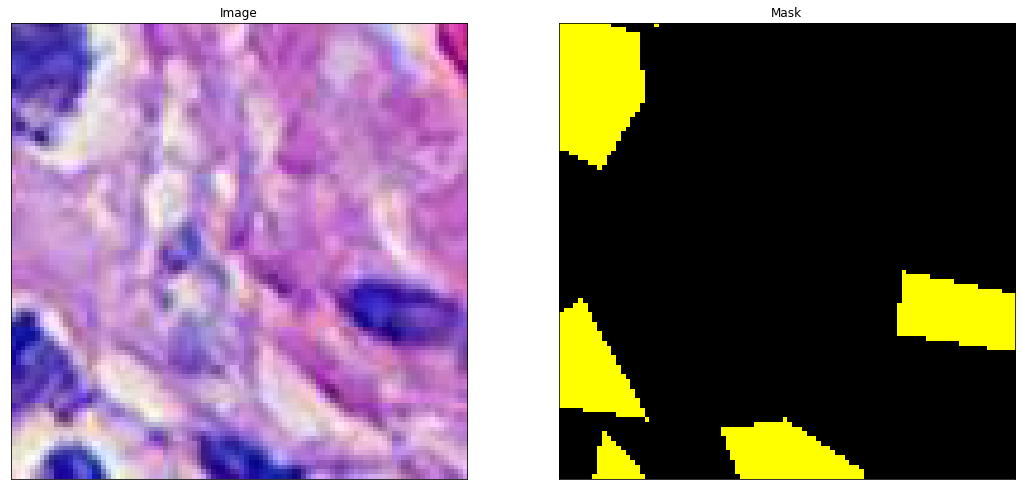

In [16]:
rand_idx = random.randrange(len(image_fns))
print("Index: " + str(rand_idx))
image_vis = Image.fromarray(joined_imgs[rand_idx])
mask_vis = Image.fromarray(joined_masks[rand_idx])
visualize(image=image_vis,
         mask=mask_vis)

## Save npy files

In [20]:
np.save(os.path.join(DATA_DIR, "images"), joined_imgs)
np.save(os.path.join(DATA_DIR, "masks"), joined_masks)

(60745, 96, 96, 3)
Index: 45384


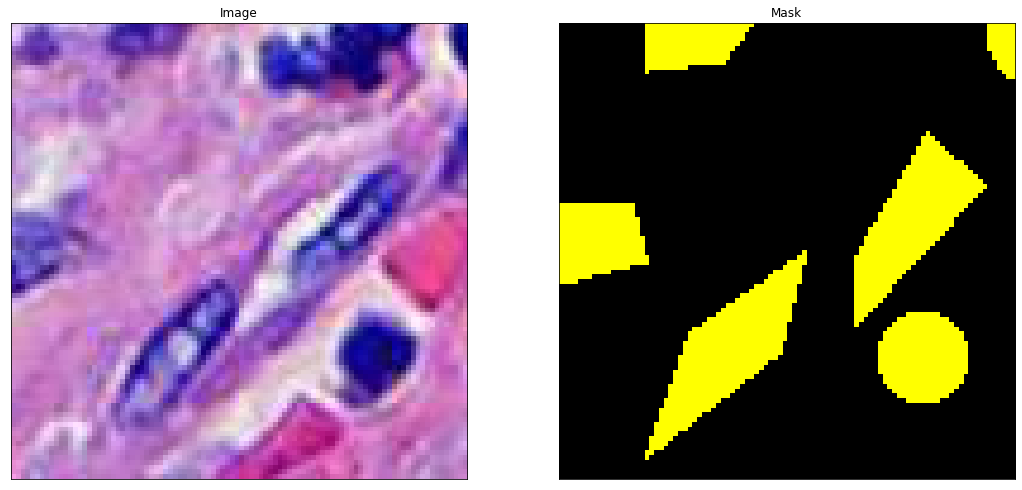

In [23]:
#testing npy files
loaded_imgs = np.load(os.path.join(DATA_DIR, "images.npy"))
loaded_masks = np.load(os.path.join(DATA_DIR, "masks.npy"))
print(loaded_imgs.shape)
rand_idx = random.randrange(len(image_fns))
print("Index: {}".format(rand_idx))
visualize(image=loaded_imgs[rand_idx],
         mask=loaded_masks[rand_idx])